Paso  A Autenticacion

In [31]:
import os
import spotipy
import pandas as pd
import matplotlib.pyplot as plt
from spotipy.oauth2 import SpotifyClientCredentials

# 1) Credenciales (de Codespaces secrets)
client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")

if not client_id or not client_secret:
    raise ValueError("Faltan CLIENT_ID o CLIENT_SECRET en los secrets de Codespaces.")

# 2) Cliente Spotify autenticado
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)


Paso B TOP 10 Tracks del artista

In [32]:
artist_id = "3bgsNtcf5d5h9jbQbohfBK"

results = sp.artist_top_tracks(artist_id, country="ES")  
tracks = results["tracks"][:10]

print("Tracks:", len(tracks))
print("Primera:", tracks[0]["name"])


Tracks: 10
Primera: La vereda de la puerta de atrás


Paso C — Track listing → DataFrame (name, popularity, duration_min)

In [33]:
track_data = []
for t in tracks:
    track_data.append({
        "name": t["name"],
        "popularity": t["popularity"],
        "duration_min": round(t["duration_ms"] / 1000 / 60, 2)
    })

df = pd.DataFrame(track_data)
print(df)


                              name  popularity  duration_min
0  La vereda de la puerta de atrás          72          4.06
1                     Si te vas...          70          8.61
2                         Stand By          69          3.47
3                        So payaso          67          4.69
4                            Salir          66          5.32
5       Dulce introducción al caos          66          7.70
6                            Golfa          62          5.99
7   Cuarto movimiento: la realidad          62          5.82
8                Jesucristo García          62          4.84
9                             Puta          62          5.38


Paso D — Ordenar por popularidad creciente y mostrar top 3

In [34]:
df_sorted = df.sort_values("popularity", ascending=False)
top_3 = df_sorted.head(3)

print("\nTop 3 mas populares dentro del top 10:")
print(top_3)



Top 3 mas populares dentro del top 10:
                              name  popularity  duration_min
0  La vereda de la puerta de atrás          72          4.06
1                     Si te vas...          70          8.61
2                         Stand By          69          3.47


Paso E — Scatter plot duración vs popularidad + guardar imagen

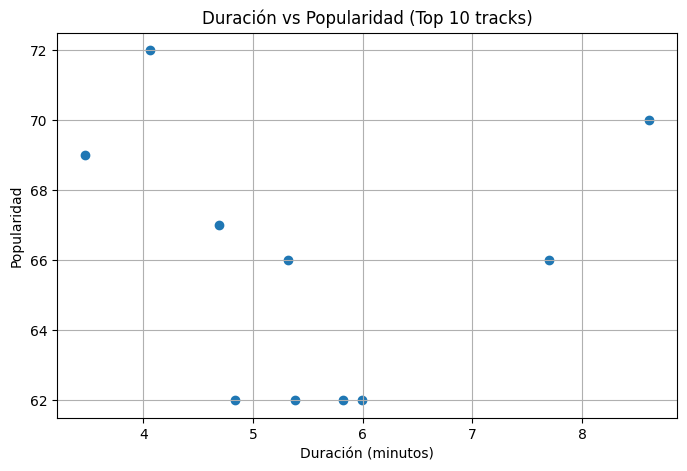

In [35]:
plt.figure(figsize=(8, 5))
plt.scatter(df["duration_min"], df["popularity"])
plt.xlabel("Duración (minutos)")
plt.ylabel("Popularidad")
plt.title("Duración vs Popularidad (Top 10 tracks)")
plt.grid(True)

plt.show()


In [36]:
plt.savefig("duration_plot.jpg", dpi=300)

<Figure size 640x480 with 0 Axes>